Uses this dataset: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from seaborn import color_palette
import cv2
import os
from pathlib import Path

C:\Users\Kirina\anaconda3\envs\tensorflow-yolo\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
_TRAIN_IMAGE_DIRECTORY = Path("../data/images/train/")
_TRAIN_LABEL_DIRECTORY = Path("../data/labels/train/")

In [3]:
def create_image_list(directory):
    for root, dirs, files in os.walk(directory):
        return files

train_images = create_image_list(_TRAIN_IMAGE_DIRECTORY)
print("Amount of train images: ", len(train_images))

Amount of train images:  13386


In [4]:
def parse_annotations_yolo(annotions_file_path, image_width, image_height):
    annotations = []
    with open(annotions_file_path, 'r') as file:
        for box_annotation in file:
            coordinates = box_annotation.strip().split()[1:]
            x_center, y_center, width, height = map(float, coordinates)
            x_min = int((x_center - width / 2) * image_width)
            y_min = int((y_center - height / 2) * image_height)
            x_max = int((x_center + width / 2) * image_width)
            y_max = int((y_center + height / 2) * image_height)
            annotations.append(((x_min, y_min), (x_max, y_max)))
    return annotations

### Plot some images with bounding boxes

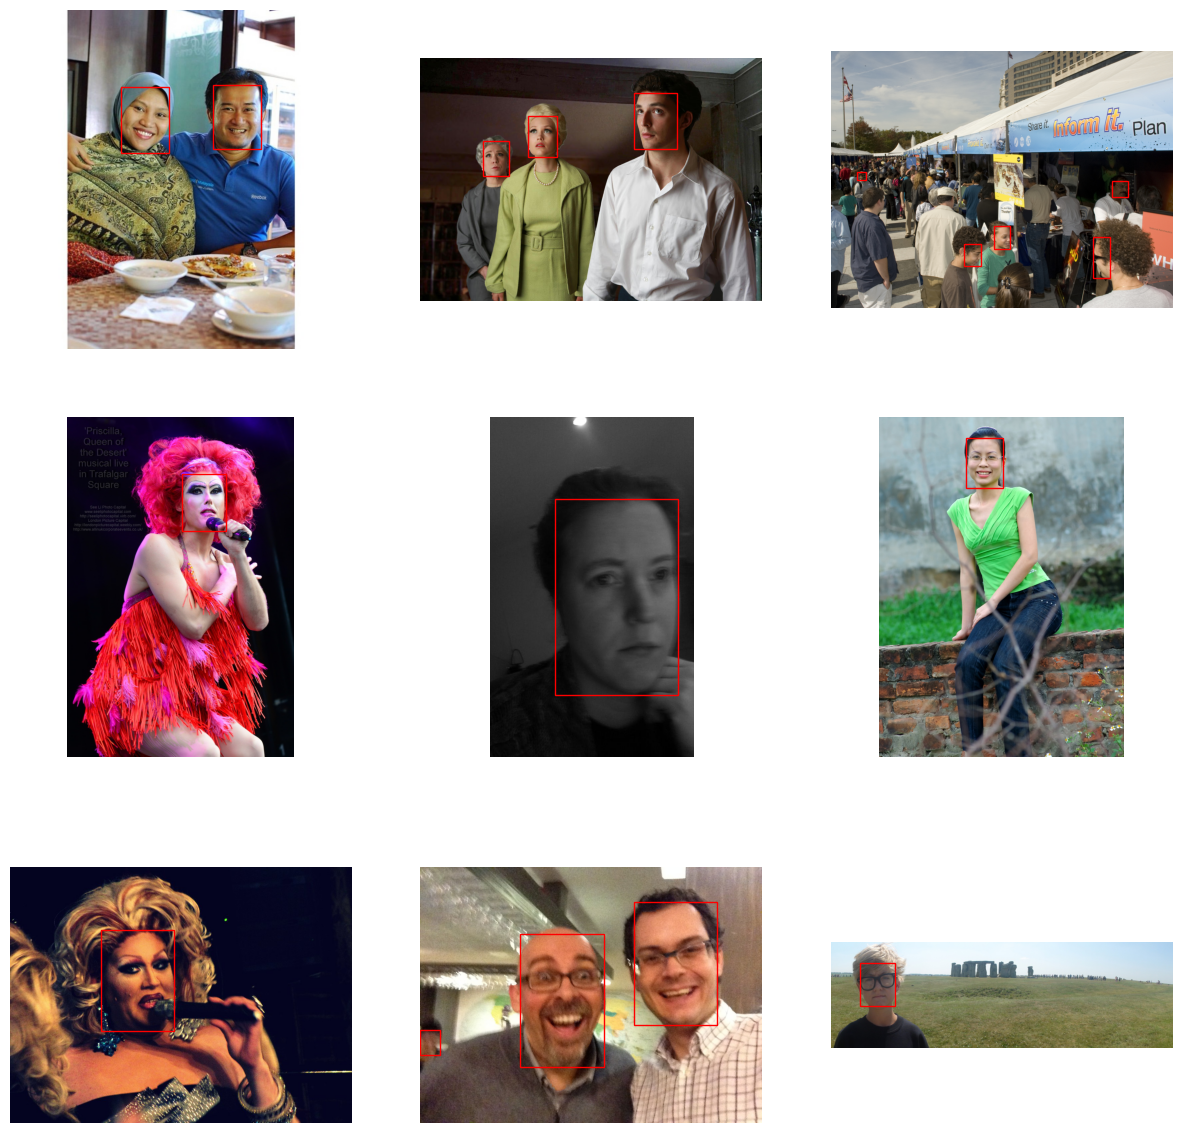

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for ax, image_path in zip(axs, train_images[:9]):
    image_path = Path(image_path)
    image = Image.open(_TRAIN_IMAGE_DIRECTORY/image_path)
    image_width, image_height = image.size
    
    annotations = parse_annotations_yolo(_TRAIN_LABEL_DIRECTORY/image_path.with_suffix(".txt"), 
                                         image_width, image_height)
    
    ax.imshow(image)
    for ((x_min, y_min), (x_max, y_max)) in annotations:
        bounding_box = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(bounding_box)
    ax.axis('off')
